**Vamos experimentar agora o algoritmo Decision Tree?**

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier

In [111]:
import pickle
with open('Restaurante.pkl', 'rb') as f:
  X_treino, X_teste, y_treino, y_teste = pickle.load(f)

In [112]:
modelo = DecisionTreeClassifier(criterion='entropy')
Y = modelo.fit(X_treino, y_treino)



> **Vamos testar o modelo?**



In [113]:
previsoes = modelo.predict(X_teste)

In [114]:
previsoes

array(['Não', 'Sim', 'Sim'], dtype=object)



> **Será se o modelo acertou?**



In [115]:
y_teste

10    Não
9     Não
0     Sim
Name: conc, dtype: object

In [116]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

0.6666666666666666

In [117]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[1, 1],
       [0, 1]])

c:\Users\llays\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6666666666666666

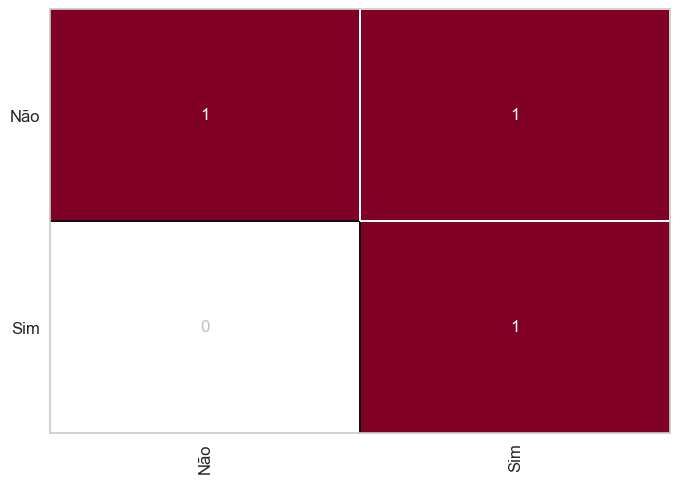

In [118]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [119]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

         Não       1.00      0.50      0.67         2
         Sim       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



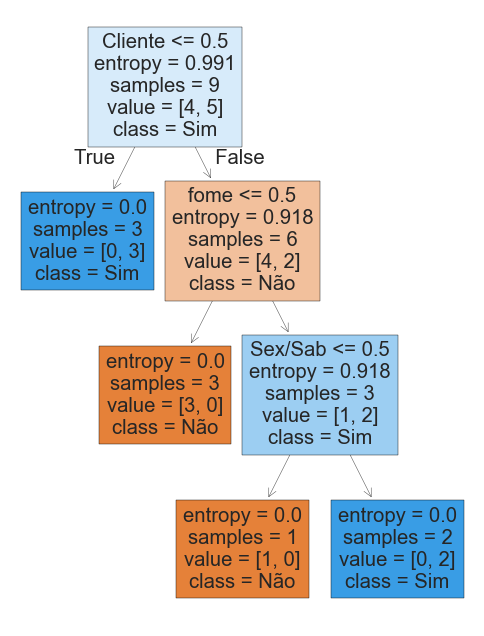

In [120]:
from sklearn import tree
previsores = X_treino.columns
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(6,8))
tree.plot_tree(modelo, feature_names=previsores, class_names = modelo.classes_, filled=True);

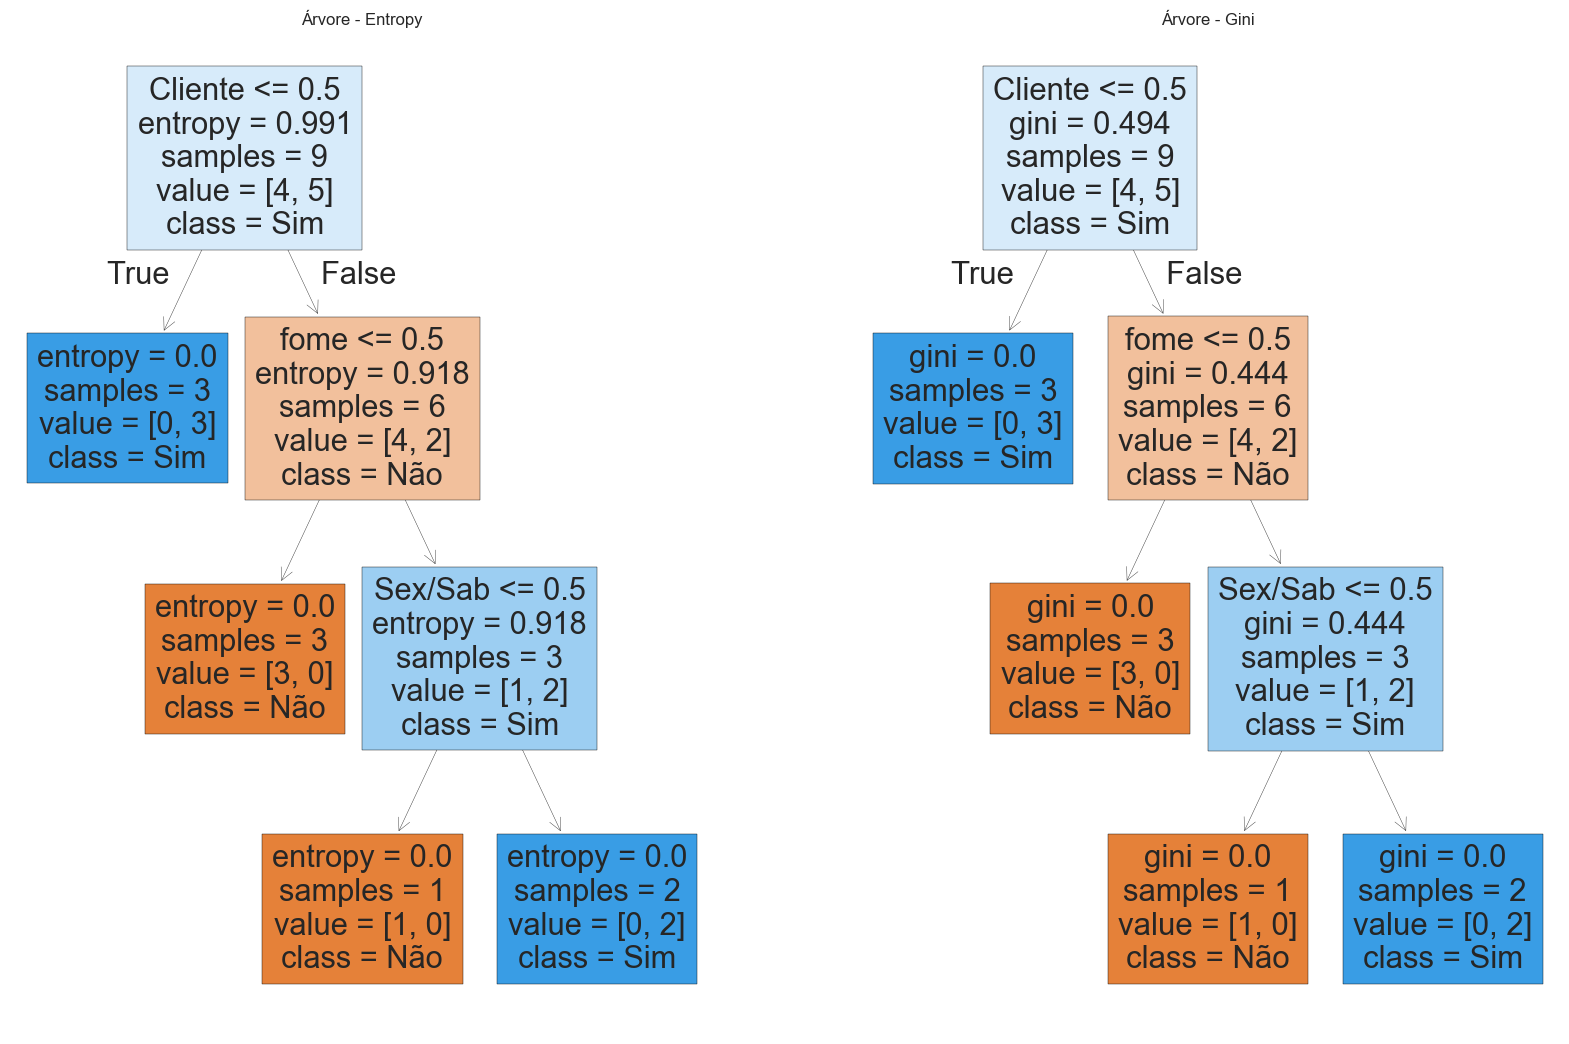

In [121]:
# Criar os modelos
modelo_entropy = tree.DecisionTreeClassifier(criterion='entropy', random_state=42)
modelo_gini = tree.DecisionTreeClassifier(criterion='gini', random_state=42)

# Treinar os modelos
modelo_entropy.fit(X_treino, y_treino)
modelo_gini.fit(X_treino, y_treino)

# Plotar as árvores lado a lado
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 13))

# Árvore com Entropy
tree.plot_tree(modelo_entropy, feature_names=X_treino.columns, class_names=modelo_entropy.classes_, filled=True, ax=axes[0])
axes[0].set_title("Árvore - Entropy")

# Árvore com Gini
tree.plot_tree(modelo_gini, feature_names=X_treino.columns, class_names=modelo_gini.classes_, filled=True, ax=axes[1])
axes[1].set_title("Árvore - Gini")

plt.show()